In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import optimizers


ImportError: No module named keras

In [2]:
seed = 42
train = 'mnist_train.csv';
dataframe = pd.read_csv(train, header=0) ;
X = dataframe.iloc[:, 1:];
y = dataframe.iloc[:, 0];


In [3]:
def split(X, y):
    train_size = 0.8
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed)
    return X_train, X_test, y_train, y_test

In [4]:
binarizer = preprocessing.Binarizer()
X_binarized = binarizer.transform(X)
X_binarized = pd.DataFrame(X_binarized)
X_train, X_test, y_train, y_test = split(X_binarized, y)

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


C:\ProgramData\Anaconda_New\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_train shape: (48000, 28, 28, 1)
Number of images in x_train 48000
Number of images in x_test 12000


In [36]:

# Creating a Sequential Model and adding the layers

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(1024,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [37]:
#Compile the model
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
history1 = model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test), epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1148s 24ms/step - loss: 0.3184 - acc: 0.8971 - val_loss: 0.1120 - val_acc: 0.9657
Epoch 2/10
48000/48000 [==============================] - 1256s 26ms/step - loss: 0.0916 - acc: 0.9721 - val_loss: 0.0734 - val_acc: 0.9764
Epoch 3/10
48000/48000 [==============================] - 1263s 26ms/step - loss: 0.0656 - acc: 0.9794 - val_loss: 0.0712 - val_acc: 0.9798
Epoch 4/10
48000/48000 [==============================] - 1232s 26ms/step - loss: 0.0493 - acc: 0.9846 - val_loss: 0.0637 - val_acc: 0.9828
Epoch 5/10
48000/48000 [==============================] - 1117s 23ms/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.0696 - val_acc: 0.9792
Epoch 6/10
48000/48000 [==============================] - 1136s 24ms/step - loss: 0.0340 - acc: 0.9886 - val_loss: 0.0636 - val_acc: 0.9832
Epoch 7/10
48000/48000 [==============================] - 1153s 24ms/step - loss: 0.0264 - acc: 0.9916 - val_l

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


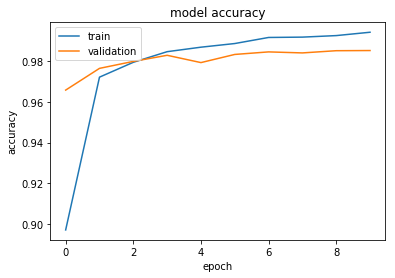

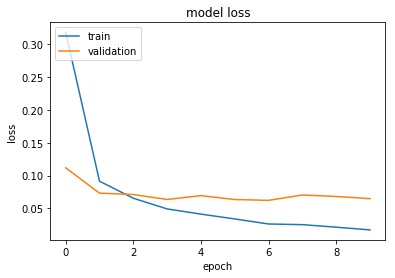

The mean squared error (MSE) for the test data set is: [0.06498742463268961, 0.9851666666666666]
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1102s 23ms/step - loss: 0.0131 - acc: 0.9956 - val_loss: 0.0668 - val_acc: 0.9854
Epoch 2/10
48000/48000 [==============================] - 1148s 24ms/step - loss: 0.0134 - acc: 0.9956 - val_loss: 0.0649 - val_acc: 0.9859
Epoch 3/10
48000/48000 [==============================] - 1159s 24ms/step - loss: 0.0120 - acc: 0.9962 - val_loss: 0.0628 - val_acc: 0.9865
Epoch 4/10
48000/48000 [==============================] - 1127s 23ms/step - loss: 0.0098 - acc: 0.9969 - val_loss: 0.0616 - val_acc: 0.9867
Epoch 5/10
48000/48000 [==============================] - 1196s 25ms/step - loss: 0.0094 - acc: 0.9970 - val_loss: 0.0609 - val_acc: 0.9873
Epoch 6/10
48000/48000 [==============================] - 1258s 26ms/step - loss: 0.0085 - acc: 0.9975 - val_loss: 0.0603 - val_acc: 0.9875
Epoch 7/10
48

In [41]:
history2 = model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test), batch_size = 10000, epochs=10)


In [42]:
keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history4 = model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test), batch_size = 10000, epochs=10)
model.save("trained_model_P3.h5")

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1266s 26ms/step - loss: 0.0063 - acc: 0.9982 - val_loss: 0.0549 - val_acc: 0.9881
Epoch 2/10
48000/48000 [==============================] - 1266s 26ms/step - loss: 0.0033 - acc: 0.9994 - val_loss: 0.0563 - val_acc: 0.9887
Epoch 3/10
48000/48000 [==============================] - 1262s 26ms/step - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0570 - val_acc: 0.9884
Epoch 4/10
48000/48000 [==============================] - 1263s 26ms/step - loss: 0.0023 - acc: 0.9996 - val_loss: 0.0603 - val_acc: 0.9879
Epoch 5/10
48000/48000 [==============================] - 1264s 26ms/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0629 - val_acc: 0.9887
Epoch 6/10
48000/48000 [==============================] - 1268s 26ms/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0629 - val_acc: 0.9888
Epoch 7/10
48000/48000 [==============================] - 1264s 26ms/step - loss: 0.0014 - acc: 0.9998 - val_l

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1132s 24ms/step - loss: 0.2210 - acc: 0.9303 - val_loss: 0.1034 - val_acc: 0.9675
Epoch 2/10
48000/48000 [==============================] - 1124s 23ms/step - loss: 0.0912 - acc: 0.9711 - val_loss: 0.0717 - val_acc: 0.9782
Epoch 3/10
48000/48000 [==============================] - 1110s 23ms/step - loss: 0.0649 - acc: 0.9793 - val_loss: 0.0733 - val_acc: 0.9778
Epoch 4/10
48000/48000 [==============================] - 1115s 23ms/step - loss: 0.0500 - acc: 0.9844 - val_loss: 0.0649 - val_acc: 0.9817
Epoch 5/10
48000/48000 [==============================] - 1123s 23ms/step - loss: 0.0395 - acc: 0.9875 - val_loss: 0.0807 - val_acc: 0.9790
Epoch 6/10
48000/48000 [==============================] - 1111s 23ms/step - loss: 0.0330 - acc: 0.9897 - val_loss: 0.0644 - val_acc: 0.9828
Epoch 7/10
48000/48000 [==============================] - 1116s 23ms/step - loss: 0.0291 - acc: 0.9905 - val_l

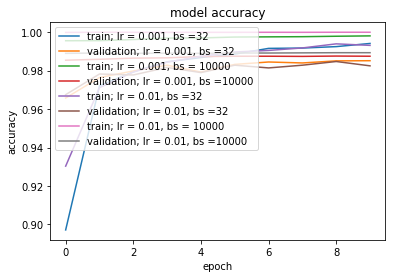

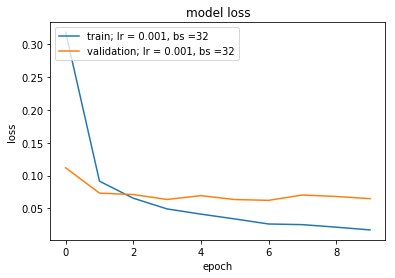

The mean squared error (MSE) for the test data set is: [0.07914956331351337, 0.9825]


In [60]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train; lr = 0.001, bs =32', 'validation; lr = 0.001, bs =32','train; lr = 0.001, bs = 10000', 'validation; lr = 0.001, bs =10000','train; lr = 0.01, bs =32', 'validation; lr = 0.01, bs =32','train; lr = 0.01, bs = 10000', 'validation; lr = 0.01, bs =10000'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train; lr = 0.001, bs =32', 'validation; lr = 0.001, bs =32','train; lr = 0.001, bs = 10000', 'validation; lr = 0.001, bs =10000','train; lr = 0.01, bs =32', 'validation; lr = 0.01, bs =32','train; lr = 0.01, bs = 10000', 'validation; lr = 0.01, bs =10000'], loc='upper left')
plt.show()
test_error_rate = model.evaluate(x_test, y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

In [67]:
model.save("trained_model_P3.h5")

In [ ]:
test_data = pd.read_csv('mnist_test.csv')
Test_Data = test_data.iloc[:, 1:];
Test_Labels = test_data.iloc[:, 0];
# Reshaping the array to 4-dims so that it can work with the Keras API
Test_Data = Test_Data.values.reshape(Test_Data.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
Test_Data = Test_Data.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
Test_Data /= 255
print('Test_Data shape:', Test_Data.shape)
print('Number of images in ', Test_Data.shape[0])


In [ ]:
model = keras.models.load_model("trained_model_P3.h5")
predictions = model.predict(x_test)

In [ ]:
aa=pd.DataFrame(predictions)

In [ ]:
a = np.zeros(shape=(10000,10))
for i in range(0,10000):
        Index = Test_Labels.loc[i]
        a[i][Index] = 1 

In [ ]:
model = keras.models.load_model("trained_model_P3.h5")
predictions = model.predict(x_test)
count = 0
Sub = np.subtract(predictions,a)
for i in range(0,10000):
    AA = np.count_nonzero(Sub[i,])
    if AA!= 0:
        count = count +1
        
Test_Accuracy = 1 - count/10000.
print(Test_Accuracy)

In [16]:
history.history

{'val_loss': [2.300977408885956,
  2.3008289138476052,
  2.300803283850352,
  2.3007960319519043,
  2.3006953597068787],
 'val_acc': [0.11016666827102502,
  0.11016666827102502,
  0.11016666827102502,
  0.11016666827102502,
  0.11016666827102502],
 'loss': [2.301483785112699,
  2.3006851077079773,
  2.3005767514308295,
  2.300527701775233,
  2.3004491478204727],
 'acc': [0.11406249972060323,
  0.1129166663934787,
  0.11291666701436043,
  0.11291666716958086,
  0.11291666592781742]}

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


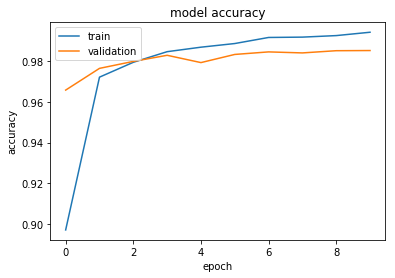

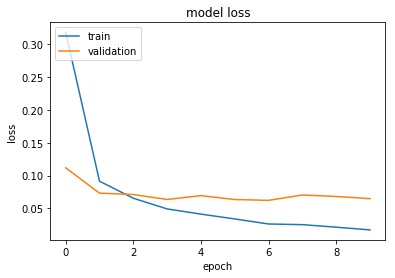

The mean squared error (MSE) for the test data set is: [0.06498742463268961, 0.9851666666666666]


In [40]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
test_error_rate = model.evaluate(x_test, y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

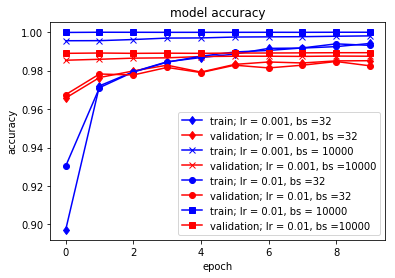

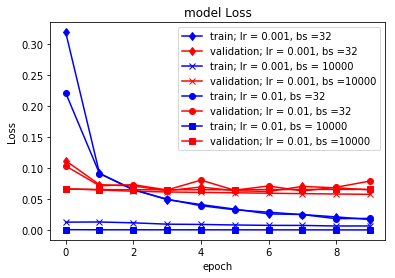

In [64]:
#  "Accuracy"
fig = plt.figure()
plt.plot(history1.history['acc'],'b-d')
plt.plot(history1.history['val_acc'],'r-d')
plt.plot(history2.history['acc'],'b-x')
plt.plot(history2.history['val_acc'],'r-x')
plt.plot(history3.history['acc'],'b-o')
plt.plot(history3.history['val_acc'],'r-o')
plt.plot(history4.history['acc'],'b-s')
plt.plot(history4.history['val_acc'],'r-s')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train; lr = 0.001, bs =32', 'validation; lr = 0.001, bs =32','train; lr = 0.001, bs = 10000', 'validation; lr = 0.001, bs =10000','train; lr = 0.01, bs =32', 'validation; lr = 0.01, bs =32','train; lr = 0.01, bs = 10000', 'validation; lr = 0.01, bs =10000'], loc='best')
plt.show()
fig.savefig('Accuracy.png')


#  "Accuracy"
fig = plt.figure()
plt.plot(history1.history['loss'],'b-d')
plt.plot(history1.history['val_loss'],'r-d')
plt.plot(history2.history['loss'],'b-x')
plt.plot(history2.history['val_loss'],'r-x')
plt.plot(history3.history['loss'],'b-o')
plt.plot(history3.history['val_loss'],'r-o')
plt.plot(history4.history['loss'],'b-s')
plt.plot(history4.history['val_loss'],'r-s')
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train; lr = 0.001, bs =32', 'validation; lr = 0.001, bs =32','train; lr = 0.001, bs = 10000', 'validation; lr = 0.001, bs =10000','train; lr = 0.01, bs =32', 'validation; lr = 0.01, bs =32','train; lr = 0.01, bs = 10000', 'validation; lr = 0.01, bs =10000'], loc='best')
plt.show()
fig.savefig('Loss.png', bbox_inches='tight')



In [61]:
# Creating a Sequential Model and adding the layers

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(1024,activation=tf.nn.tanh))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

#Compile the model
keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history8 = model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test), batch_size = 10000, epochs=10)





Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1126s 23ms/step - loss: 2.2992 - acc: 0.1070 - val_loss: 2.2925 - val_acc: 0.1102
Epoch 2/10
48000/48000 [==============================] - 1126s 23ms/step - loss: 2.2802 - acc: 0.2398 - val_loss: 2.2511 - val_acc: 0.1412
Epoch 3/10
48000/48000 [==============================] - 1128s 24ms/step - loss: 2.2131 - acc: 0.3546 - val_loss: 2.1301 - val_acc: 0.4954
Epoch 4/10
48000/48000 [==============================] - 1159s 24ms/step - loss: 2.0398 - acc: 0.5695 - val_loss: 1.8681 - val_acc: 0.6685
Epoch 5/10
48000/48000 [==============================] - 1120s 23ms/step - loss: 1.7211 - acc: 0.6527 - val_loss: 1.4672 - val_acc: 0.6640
Epoch 6/10
48000/48000 [==============================] - 1133s 24ms/step - loss: 1.2996 - acc: 0.7029 - val_loss: 1.0446 - val_acc: 0.7449
Epoch 7/10
48000/48000 [==============================] - 1146s 24ms/step - loss: 0.9274 - acc: 0.7570 - val_l

In [62]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(1024,activation=tf.nn.sigmoid))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

#Compile the model
keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history9 = model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test), batch_size = 10000, epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1129s 24ms/step - loss: 2.4821 - acc: 0.0972 - val_loss: 2.3750 - val_acc: 0.1102
Epoch 2/10
48000/48000 [==============================] - 1130s 24ms/step - loss: 2.4229 - acc: 0.1033 - val_loss: 2.3426 - val_acc: 0.0995
Epoch 3/10
48000/48000 [==============================] - 1137s 24ms/step - loss: 2.3773 - acc: 0.1003 - val_loss: 2.3192 - val_acc: 0.0980
Epoch 4/10
48000/48000 [==============================] - 1139s 24ms/step - loss: 2.3661 - acc: 0.1031 - val_loss: 2.3030 - val_acc: 0.0995
Epoch 5/10
48000/48000 [==============================] - 1128s 24ms/step - loss: 2.3578 - acc: 0.1055 - val_loss: 2.2993 - val_acc: 0.1016
Epoch 6/10
48000/48000 [==============================] - 1132s 24ms/step - loss: 2.3500 - acc: 0.1062 - val_loss: 2.2925 - val_acc: 0.1128
Epoch 7/10
48000/48000 [==============================] - 1133s 24ms/step - loss: 2.3423 - acc: 0.1109 - val_l

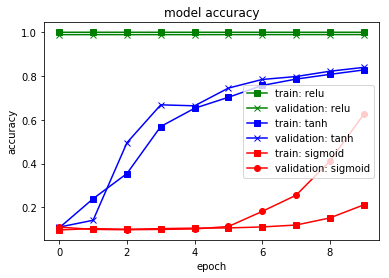

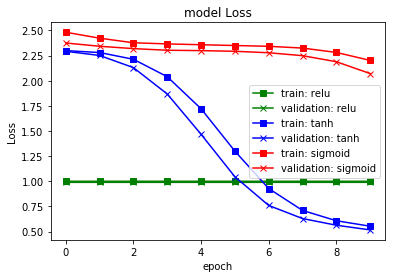

In [66]:
#  "Accuracy"
fig = plt.figure()
plt.plot(history4.history['acc'],'g-s')
plt.plot(history4.history['val_acc'],'g-x')
plt.plot(history8.history['acc'],'b-s')
plt.plot(history8.history['val_acc'],'b-x')
plt.plot(history9.history['acc'],'r-s')
plt.plot(history9.history['val_acc'],'r-o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train: relu', 'validation: relu','train: tanh', 'validation: tanh','train: sigmoid', 'validation: sigmoid'], loc='best')
plt.show()
fig.savefig('Activation_Accuracy.png')


#  "Accuracy"
fig = plt.figure()
plt.plot(history4.history['acc'],'g-s')
plt.plot(history4.history['val_acc'],'g-x')
plt.plot(history8.history['loss'],'b-s')
plt.plot(history8.history['val_loss'],'b-x')
plt.plot(history9.history['loss'],'r-s')
plt.plot(history9.history['val_loss'],'r-x')

plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train: relu', 'validation: relu','train: tanh', 'validation: tanh','train: sigmoid', 'validation: sigmoid'], loc='best')
plt.show()
fig.savefig('Activation_Loss.png', bbox_inches='tight')



In [69]:
keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history4 = model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test), batch_size = 10000, epochs=10)
model.save("trained_model_P3.h5")
test_data = pd.read_csv('mnist_test.csv')
Test_Data = test_data.iloc[:, 1:];
Test_Labels = test_data.iloc[:, 0];
# Reshaping the array to 4-dims so that it can work with the Keras API
Test_Data = Test_Data.values.reshape(Test_Data.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
Test_Data = Test_Data.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
Test_Data /= 255
print('Test_Data shape:', Test_Data.shape)
print('Number of images in ', Test_Data.shape[0])
model = keras.models.load_model("trained_model_P3.h5")
predictions = model.predict(Test_Data)
count = 0
Sub = np.subtract(predictions,a)
for i in range(0,10000):
    AA = np.count_nonzero(Sub[i,])
    if AA!= 0:
        count = count +1
        
Test_Accuracy = 1 - count/10000.
print(Test_Accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1144s 24ms/step - loss: 2.1349 - acc: 0.2502 - val_loss: 2.0397 - val_acc: 0.4852
Epoch 2/10
48000/48000 [==============================] - 1174s 24ms/step - loss: 2.0000 - acc: 0.3356 - val_loss: 1.8832 - val_acc: 0.3453
Epoch 3/10
48000/48000 [==============================] - 1164s 24ms/step - loss: 1.8392 - acc: 0.4252 - val_loss: 1.6822 - val_acc: 0.6948
Epoch 4/10
48000/48000 [==============================] - 1156s 24ms/step - loss: 1.6502 - acc: 0.5390 - val_loss: 1.4788 - val_acc: 0.6434
Epoch 5/10
48000/48000 [==============================] - 1131s 24ms/step - loss: 1.4452 - acc: 0.5905 - val_loss: 1.2713 - val_acc: 0.7212
Epoch 6/10
48000/48000 [==============================] - 1136s 24ms/step - loss: 1.2427 - acc: 0.6736 - val_loss: 1.0839 - val_acc: 0.7454
Epoch 7/10
48000/48000 [==============================] - 1139s 24ms/step - loss: 1.0620 - acc: 0.7068 - val_l

NameError: name 'a' is not defined

In [76]:
test_data = pd.read_csv('mnist_test.csv')
Test_Data = test_data.iloc[:, 1:];
Test_Labels = test_data.iloc[:, 0];
# Reshaping the array to 4-dims so that it can work with the Keras API
Test_Data = Test_Data.values.reshape(Test_Data.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
Test_Data = Test_Data.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
Test_Data /= 255
print('Test_Data shape:', Test_Data.shape)
print('Number of images in ', Test_Data.shape[0])
model = keras.models.load_model("trained_model_P3.h5")
predictions = model.predict(Test_Data)
count = 0
Sub = np.subtract(predictions,a)
for i in range(0,10000):
    AA = np.count_nonzero(Sub[i,])
    if AA!= 0:
        count = count +1
        
Test_Accuracy = 1 - count/10000.
print(Test_Accuracy)

Test_Data shape: (10000, 28, 28, 1)
Number of images in  10000
0.0


In [80]:
predictions

array([[3.4887489e-02, 2.5118099e-10, 5.3660973e-04, ..., 4.2453274e-01,
        2.3924428e-01, 2.3183275e-02],
       [9.5399722e-02, 6.1611773e-09, 4.9134883e-01, ..., 4.4023554e-09,
        4.0014932e-01, 2.3075427e-06],
       [1.8284288e-08, 1.6417495e-08, 2.7853041e-05, ..., 5.8020355e-10,
        9.9996650e-01, 3.8016603e-07],
       ...,
       [1.0493738e-04, 9.1348269e-11, 2.2231437e-04, ..., 1.7641805e-05,
        9.4604343e-01, 2.7798139e-02],
       [2.9534535e-04, 2.9158540e-11, 7.2572053e-05, ..., 3.6673319e-07,
        9.9836189e-01, 6.4944261e-04],
       [6.4615093e-02, 4.4078467e-11, 7.9322197e-02, ..., 2.8923072e-08,
        3.7054154e-03, 4.1736919e-05]], dtype=float32)